In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N*x

In [3]:
def run_experiment(means, eps, N):
    bandits = [Bandit(mean) for mean in means]
    # 'data' for plotting
    data = np.empty(N)
    # epsilon greedy
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(means))
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
                
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N)+1)
    
    plt.plot(cumulative_average)
    for mean in means:
        plt.plot(np.ones(N)*mean)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
    return cumulative_average

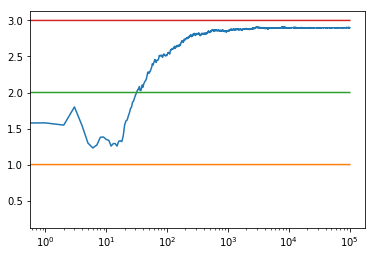

1.0072526719950665
1.9793132015648636
3.0032963817501654


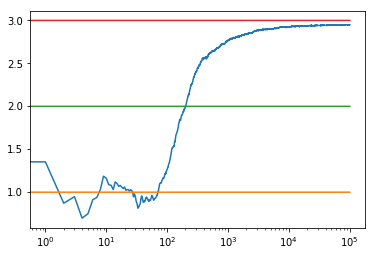

1.00470954258184
1.9942037218232052
3.000339547805963


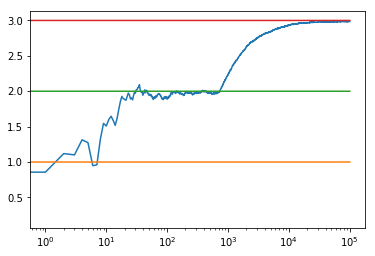

0.9975174043454109
2.0061059073631857
3.002354215239335


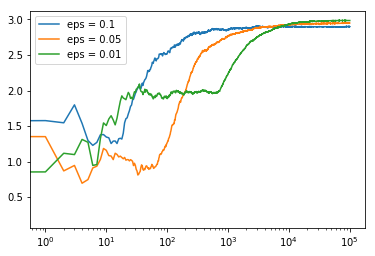

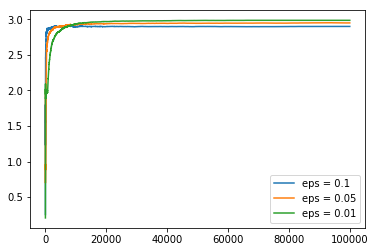

In [6]:
if __name__ == '__main__':
    c_1 = run_experiment([1.0, 2.0, 3.0], 0.1,100000)
    c_05 = run_experiment([1.0, 2.0, 3.0], 0.05,100000)
    c_01 = run_experiment([1.0, 2.0, 3.0], 0.01,100000)
    
    #log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()
    
    #linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()
    